# Project: Medical Appointment No Shows Analaysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#reference">Reference</a></li>
</ul>

<a id='intro'></a>
## Introduction 

**The No show appointment dataset contains information of over 110,000 patients scheduled for appointments. The purpose of the project is to analyse the factors behind a patient showing up or not showing up for their scheduled appointment after being given all the necessary information required to attend. There are 14 columns in the data set, each variable is described below:**

**PatientId** - a unique identifier for each patient

**AppointmentID** - a unique identifier for each appointment

**Gender** - the gender of the patient, whether Male or Female

**ScheduledDay** - the day in which the appointment the patient scheduled the appointment

**AppointmentDay** - the day the patient is to honor the appointment or visit the medical doctor

**Age** - patient's age

**Neighbourhood** - the location where the appointment is to be held

**Scholarship** - if the patient has access to financial aid or not

**Hipertension** - whether the patient is hypertensive or not

**Diabetes** - whether the patient is diabetic or not

**Alcoholism** - if the patient is an alcholic or not

**Handcap** - information on if the patient is handicaped or not

**SMS_received** - did the patient receive an sms from the clinic or not

**No-show** - whether the patient showed up for their appointment or not. For understandability this was changed to Absent


### Question(s) for Analysis

1. What gender has the highest rate of showing up for appointments?
    Here, we'll be analysing if a particular gender has more show ups than the other. 
    
    
2. Which neighbourhood has the highest amount of No-shows and the highest amount of shows?
    We'll also be taking a look at the top two neigbourhoods with the highest amount of shows and no-show. To discover if tthe 
    location of the hospital affects no-shows.
    
    
3. Do patients with Scholarships attend more appointments?
    Discovering if access to scholarships results to be a better chance of a patient showing up for their appointment, 
    considering that they have to pay little to nothing.
    
    
4. Are patients who get sms reminders more likely to show up?
    Receiving sms serves as a reminder for patients about their appointment. We'll like to see what impact receiving a sms has 
    on showing up for appointment.
    
    
5. What month has the highest and lowest show up?
     Lastly, we'll be looking at the month with the highest and lowest show up. It is possible that most appointments are 
     scheduled around a particular month with more favourable conditions that enable patients come out.

In [1]:
# loading data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrading pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.7MB/s eta 0:00:01  6% |██                              | 645kB 25.2MB/s eta 0:00:01    27% |████████▋                       | 2.8MB 18.5MB/s eta 0:00:01    46% |███████████████                 | 4.9MB 18.5MB/s eta 0:00:01    69% |██████████████████████▍         | 7.3MB 27.4MB/s eta 0:00:01    82% |██████████████████████████▌     | 8.7MB 29.7MB/s eta 0:00:01    95% |██████████████████████████████▋ | 10.0MB 28.4MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.5MB/s eta 0:00:01   42% |█████████████▌                  | 5.7MB 26.6MB/s eta 0:00:01    57% |██████████████████▌             | 7.8MB 23.9MB/s eta 0:00:01    90% |█████████████████████████████   | 12.1MB 26.0MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: p

<a id='wrangling'></a>
## Data Wrangling

The first step is loading the data set and reviewing the various components of the data set. I'll be taking a look at the first five rows of the data set, looking at the data types and number of values in each row using df_appointment.info() and getting a summary of the data set using the describe function.

In [2]:
df_appointment = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df_appointment.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df_appointment.shape

(110527, 14)

There are 110,527 rows and 14 columns in this data set.

In [4]:
df_appointment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df_appointment.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df_appointment.duplicated().sum()

0

In [7]:
df_appointment.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**Great!! After loading in the data set, I observed that the data isn't so dirty as there are no duplicate or null values. However, we still need to do some cleaning before we start exploring the data.**


### Data Cleaning
**In this section we will be cleaning the data based on the observations made upon loading the data set. We'll be dropping rows, renaming our columns and changing data types.**

#### Dropping Rows

After loading in our data set it is observed that the Age column has a min of -1, this isn't realistic, so we will be this. First lets find out which rows contain this value

In [8]:
df_appointment[df_appointment['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


We have only 1 row with a value of -1 and we will be dropping it.

In [9]:
df_appointment.drop(99832, axis = 0, inplace = True)

In [10]:
df_appointment.shape

(110526, 14)

We have successfully drop that row and now we have 110,526 rows.

Now that we have taken off the row, we would need to reset the index.

In [11]:
##using .reset_index()
df_appointment.reset_index(drop = True, inplace = True)

#### Renaming Columns

The first thing I'll be doing is renaming the column headers. There are a couple of things I'd like to do here. Firstly, i'll be making all the column headers lower case, as I'm more comfortable working with that. I'd also be adding an underscore to seperate two words. For example instead of having `AppointmentID` let's make it `appointment_id`

In [12]:
#using .rename() to make all column headers lowercase

df_appointment.rename(columns = str.lower, inplace = True)
df_appointment.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [13]:
#next lets add an underscore between patientid, appointmentid, scheduledday, and appointmentday

df_appointment.rename(columns= {'patientid': 'patient_id', 'appointmentid': 'appointment_id', 'scheduledday': 'scheduled_day', 'appointmentday': 'appointment_day'},inplace=True)

df_appointment.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


Nice, that worked really well.

Finally, for this section I'd like to rename the column `no-show` as it is a bit confusing for me. I'd like to change this to `absent` as this also means that the person didn't show up, however it is easier to understand the values in the column.


In [14]:
#using .rename() to rename no-show to absent

df_appointment.rename(columns={'no-show':'absent'}, inplace=True)
df_appointment.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,absent
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


We have successufully renamed all the columns. Now we can move on to some more cleaning

#### Changing Data Types


Finally to end the cleaning process, we'll be changing the `scheduled_day` and `appointment_day` data type from object to datetime.

In [15]:
df_appointment['scheduled_day'] = pd.to_datetime(df_appointment['scheduled_day'])
df_appointment['appointment_day'] = pd.to_datetime(df_appointment['appointment_day'])
df_appointment.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,absent
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [16]:
df_appointment.dtypes

patient_id                float64
appointment_id              int64
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hipertension                int64
diabetes                    int64
alcoholism                  int64
handcap                     int64
sms_received                int64
absent                     object
dtype: object

For our analysis we'll need to get information on the months of each appointment. So, lets add a coulmn to get this.

In [17]:
#using.dt.month to extract the month from the appointment day
df_appointment['appointment_month'] = df_appointment['appointment_day'].dt.month

In [18]:
df_appointment.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,absent,appointment_month
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4


In [19]:
df_appointment['appointment_month'].unique()

array([4, 5, 6])

In [20]:
#lets change replace the appointment month values
df_appointment['appointment_month'].replace([4,5,6], ['April','May', 'June'], inplace = True)
df_appointment.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,absent,appointment_month
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,April
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,April


Lastly, let's get rid of the time stamp in the scheduled_day and appointment_day, because we don't need it for our analysis. To do that we will be using **.dt.date**

In [21]:
df_appointment['scheduled_day'] = df_appointment.scheduled_day.dt.date
df_appointment['appointment_day'] = df_appointment.appointment_day.dt.date

df_appointment.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,absent,appointment_month
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,April
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,April


Now we are done cleaning the data.

<a id='eda'></a>
## Exploratory Data Analysis

In this section, we'll be creating visualizations to analyse and answer the questions stated in the begging of the project. 
We will be using matplotib for our visualizations.

First lets take a look at the histogram for the data set

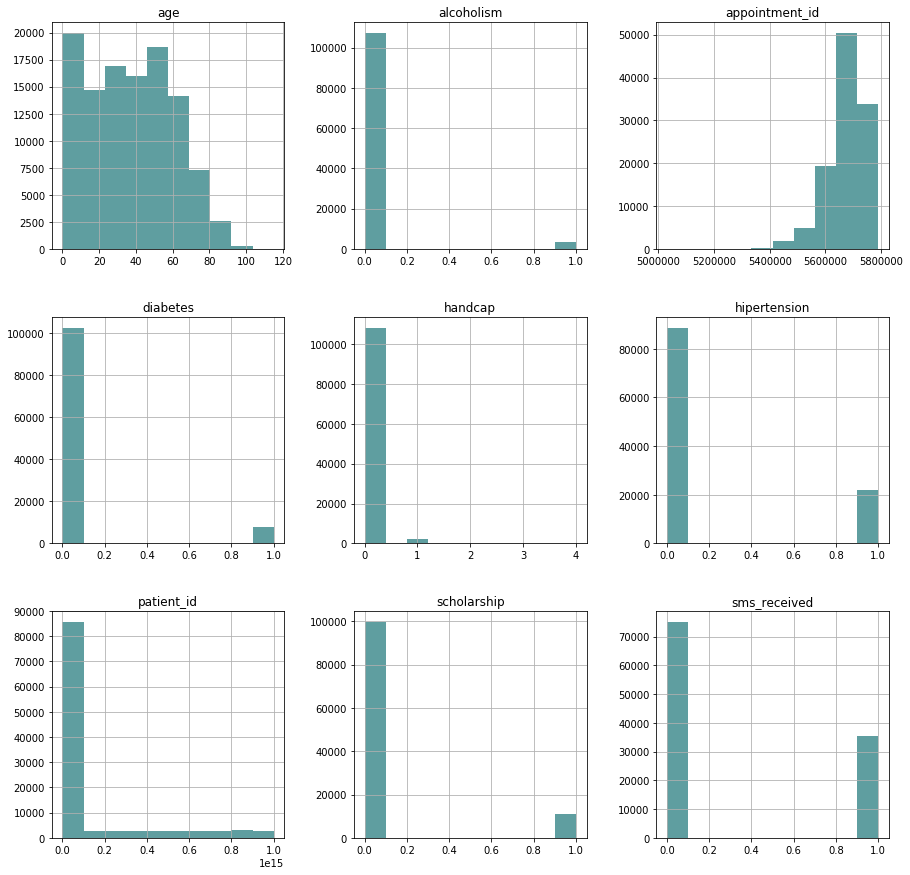

In [22]:
df_appointment.hist(color = '#5F9EA0', figsize =(15,15));

**From this visualization it can be observed that:**
   
    1.Most patients are between the ages of 0-70 
    2.Majority of patients do not have any health issues such as alcoholism, diabetes, handcap and hipertension.
    3.Only a few patients are under the scholarship, this might be as a result of the high qualification requirements.
    4. About 1/2 of the patients did receive sms
    

In [23]:
## creating functions for my axes and titles

def x_label(xaxis_label):
    plt.xlabel(xaxis_label)
    return x_label

def y_label(yaxis_label):
    plt.ylabel(yaxis_label)
    return y_label

def title(chart_title):
    plt.title(chart_title)
    return title



### What gender has the highest rate of showing up for appointments?

In [24]:
# First lets categorise our data by those who showed up and those who didn't show up.
showed_up = df_appointment['absent'] == 'No'
didnt_show_up = df_appointment['absent'] == 'Yes'


gender
F    57245
M    30962
Name: absent, dtype: int64

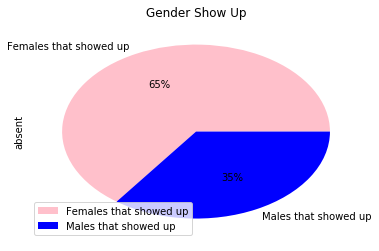

In [25]:
fig = plt.figure()
title('Gender Show Up')
labels= ['Females that showed up', 'Males that showed up']
colors=['pink', 'blue']

gender_showed_up = df_appointment[showed_up].groupby('gender')['absent'].count().plot(kind='pie', y='absent', labels=labels, colors = colors, autopct='%1.0f%%')

plt.legend(loc = 'lower left')

plt.show;
df_appointment[showed_up].groupby('gender')['absent'].count()

Based on this analysis, it is evident that more women showed up for appointments than men.

### The top two neighbourhood with the highest amount of no-shows and shows?

For this question, we want to determine which neighbourhood has the highest amount of no-shows and shows. For this analysis, we will be using a bar char

In [26]:
# To get the top two that showed up for appointments
df_appointment[showed_up].groupby('neighbourhood')['absent'].count().nlargest(n=2)

neighbourhood
JARDIM CAMBURI    6252
MARIA ORTIZ       4586
Name: absent, dtype: int64

In [27]:
# To get the top two that didn't show up for appointments
df_appointment[didnt_show_up].groupby('neighbourhood')['absent'].count().nlargest(n=2)

neighbourhood
JARDIM CAMBURI    1465
MARIA ORTIZ       1219
Name: absent, dtype: int64

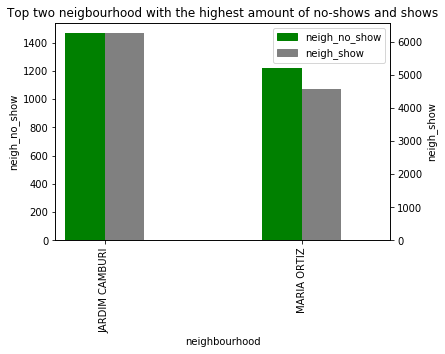

In [28]:
neigh_no_show = df_appointment[didnt_show_up].groupby('neighbourhood')['absent'].count().nlargest(n=2)
neigh_show = df_appointment[showed_up].groupby('neighbourhood')['absent'].count().nlargest(n=2)

fig = plt.figure()
axis_1= fig.add_subplot(111) # Create matplotlib axis
axis_2 = axis_1.twinx() # Create another axes that shares the same x-axis as axis_1.

width = 0.2

neigh_no_show.plot(kind='bar',  color='green', ax = axis_1, width = width,  position=1)
neigh_show.plot(kind='bar',  color='gray', ax = axis_2, width = width, position= 0)

axis_1.set_ylabel('neigh_no_show')
axis_2.set_ylabel('neigh_show')

title('Top two neigbourhood with the highest amount of no-shows and shows');

#creating a legend with the label colors
colors = {'neigh_no_show':'green', 'neigh_show':'gray'}         
custom_label= list(colors.keys())
handle = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in custom_label]
plt.legend(handle, custom_label);

It seems that JARDIM CAMBURI and MARIA ORTIZ both have the highest number of shows and no-shows. It may be deduced that the neighbourhood may not have a strong correlation with not showing up.

### Do patients with Scholarships attend more appointments?

scholarship
0    79924
1     8283
Name: absent, dtype: int64

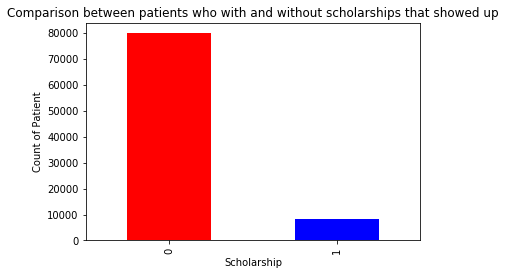

In [29]:
hue = ['r', 'b']
df_appointment[showed_up].groupby('scholarship')['absent'].count().plot(kind = 'bar', color = hue)
title('Comparison between patients who with and without scholarships that showed up')
x_label('Scholarship')
y_label('Count of Patient')

df_appointment[showed_up].groupby('scholarship')['absent'].count()

From this analysis, we can deduce that less patients with scholarships showed up for appointments. This may also be as a result of the fact that there are more patients without scholarships than does with scholarships.

### Are patients who get sms reminders more likely to show up?

sms_received
0    62509
1    25698
Name: absent, dtype: int64

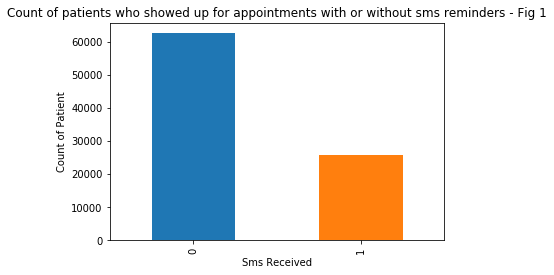

In [30]:
df_appointment[showed_up].groupby('sms_received')['absent'].count().plot(kind = 'bar')
title('Count of patients who showed up for appointments with or without sms reminders - Fig 1')
x_label('Sms Received')
y_label('Count of Patient');

df_appointment[showed_up].groupby('sms_received')['absent'].count()

sms_received
0    12535
1     9784
Name: absent, dtype: int64

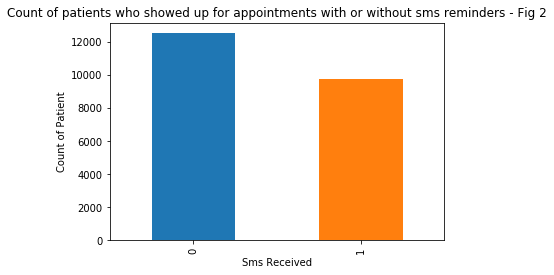

In [31]:
df_appointment[didnt_show_up].groupby('sms_received')['absent'].count().plot(kind = 'bar')
title('Count of patients who showed up for appointments with or without sms reminders - Fig 2')
x_label('Sms Received')
y_label('Count of Patient');

df_appointment[didnt_show_up].groupby('sms_received')['absent'].count()

In **fig 1**, it appears that majority of patients did show up for their appointments even though they did not receive sms reminders. 

In **fig 2**, over 9,000 patients received sms reminders and still did not show up for their appointments. It is possible that sms reminder does not guarantee a patient showing up for their appointment.

### What month has the highest and lowest of show?

appointment_month
April      633
June      4882
May      16804
Name: absent, dtype: int64

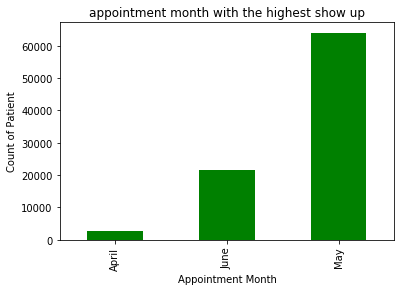

In [32]:
df_appointment[showed_up].groupby('appointment_month')['absent'].count().plot(kind = 'bar', color = 'green')
title('appointment month with the highest show up')
x_label('Appointment Month')
y_label('Count of Patient');

df_appointment[didnt_show_up].groupby('appointment_month')['absent'].count()

From this analysis, May has the highest number of show up.



From this analysis, it is observed that more Females show up for appointments with a 65% rate. This implies that more females are more liely to show up for appointments than men.

Both JARDIM CAMBURI and MARIA ORTIZ have the highest numbers of shows and no-shows for appoinment. It may mean that the neighbourhood in which the clinic is located may not really have an impact on whether a patient shows up or not.

Also, we noticed that patients without scholarships showed up for more appointments than those with scholarships. This may result from the fact that there are fewer patients with scholarships which makes it unevenly distributed.

Based on sms received, we can see that most patients showed up for appointments without receiving sms. Also, 3/4 of patients didn't show up for their appointments despite receiving sms. It may be inferred that the receipt of sms does not guarantee showing up for appointments.

Lastly, the month of may actually had more patients show up for appointments. It may be that there are more doctors or patients available during this period, or more weather conditions are more favourable etc. More analysis would need to be done on that.

Limitation of this analysis was using the hea


<a id='conclusions'></a>
## Conclusions


From this analysis, it is observed that more Females show up for appointments with a 65% rate. This implies that more females are more liely to show up for appointments than men.

Both JARDIM CAMBURI and MARIA ORTIZ have the highest numbers of shows and no-shows for appoinment. It may mean that the neighbourhood in which the clinic is located may not really have an impact on whether a patient shows up or not.

Also, we noticed that patients without scholarships showed up for more appointments than those with scholarships. This may result from the fact that there are fewer patients with scholarships which makes it unevenly distributed.

Based on sms received, we can see that most patients showed up for appointments without receiving sms. Also, 3/4 of patients didn't show up for their appointments despite receiving sms. It may be inferred that the receipt of sms does not guarantee showing up for appointments.

Lastly, the month of may actually had more patients show up for appointments. It may be that there are more doctors or patients available during this period, or more weather conditions are more favourable etc. More analysis would need to be done on that.

Limitation of this analysis was not having enough samples of patients who have scholarships, this did not allow for an adequate comparison based on the information provided on scholarships. Also, the information provided abouth health issues/illnesses did not contain enough details regarding the severity of the illness. Hence we couldn't perform any analysis based on that information.

<a id='reference'></a>
### Reference
https://stackoverflow.com/

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0